Kodingan ini digunakan untuk mencetak path file-file yang ada dalam direktori '/kaggle/input' menggunakan modul numpy, pandas, dan os.

In [ ]:
# import library
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Data Analysis

Kodingan ini digunakan untuk membaca file CSV dengan nama 'Indian Liver Patient Dataset (ILPD).csv' dan menyimpan datanya ke dalam variabel 'data' menggunakan modul pandas.

In [ ]:
data = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv')


Kodingan ini digunakan untuk menampilkan beberapa baris pertama dari dataframe 'data' menggunakan metode 'head()' dari modul pandas.

In [ ]:

data.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Kodingan ini digunakan untuk menampilkan beberapa baris terakhir dari dataframe 'data' menggunakan metode 'tail()' dari modul pandas.

In [ ]:
# melihat bagian tail
data.tail()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


Kodingan ini digunakan untuk menampilkan informasi singkat tentang dataframe 'data', termasuk jumlah kolom, tipe data, dan jumlah non-null values pada setiap kolom menggunakan metode 'info()' dari modul pandas.

In [ ]:
# Melihat informasi yang terkandung dalam data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB



Kodingan ini digunakan untuk menghitung jumlah nilai yang hilang (null) pada setiap kolom dalam dataframe 'data' menggunakan metode 'isnull().sum()' dari modul pandas.

In [ ]:
data.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64

# Imputation using SkLearns Simple Imputer for Missing Values

Kodingan ini mengimport SimpleImputer dari modul sklearn untuk menggantikan nilai yang hilang (NaN) dengan nilai rata-rata menggunakan strategi 'mean'.

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')


Kodingan ini menggantikan nilai yang hilang (NaN) pada kolom 'alkphos' dalam dataframe 'data' dengan nilai rata-rata menggunakan objek imputer 'imp' yang telah di-fit-transform.

In [ ]:
#Imputing values
data['alkphos']=imp.fit_transform(data[['alkphos']])

Kodingan ini digunakan untuk menghitung jumlah nilai yang hilang (null) pada setiap kolom dalam dataframe 'data' menggunakan metode 'isnull().sum()' dari modul pandas.

In [ ]:
data.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             0
is_patient          0
dtype: int64

Kodingan ini menghasilkan ringkasan statistik deskriptif dari dataframe 'data', termasuk jumlah data, nilai rata-rata, standar deviasi, nilai minimum dan maksimum, serta kuartil dari setiap kolom menggunakan metode 'describe()' dari modul pandas.

In [ ]:
data.describe()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


# Age has been excluded as it is a String Value and not a Number

Kodingan ini mengubah nilai pada kolom 'gender' dalam dataframe 'data' menjadi 1 jika nilainya adalah 'Male', dan menjadi 0 jika nilainya bukan 'Male', menggunakan fungsi lambda.

In [ ]:
# Replacing Male and Female with 1 and 0
data['gender'] = data['gender'].apply(lambda x:1 if x == 'Male' else 0)

Kodingan ini digunakan untuk menampilkan informasi singkat tentang dataframe 'data', termasuk jumlah kolom, tipe data, dan jumlah non-null values pada setiap kolom menggunakan metode 'info()' dari modul pandas.

In [ ]:
#Now looking at the info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    int64  
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           583 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


Kodingan ini digunakan untuk menghitung jumlah nilai yang hilang (null) pada setiap kolom dalam dataframe 'data' menggunakan metode 'isnull().sum()' dari modul pandas.

In [ ]:
data.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             0
is_patient          0
dtype: int64

Kodingan ini menghitung jumlah nilai unik (distinct) dalam setiap kolom dataframe 'data' menggunakan metode 'nunique()' dari modul pandas.

In [ ]:
data.nunique()

age                  72
gender                2
tot_bilirubin       113
direct_bilirubin     80
tot_proteins        263
albumin             152
ag_ratio            177
sgpt                 58
sgot                 40
alkphos              70
is_patient            2
dtype: int64

# Correlation Plot Map

Kodingan ini menghitung matriks korelasi antara kolom-kolom dalam dataframe 'data' dan mengaplikasikan gaya visualisasi dengan gradient warna 'coolwarm' menggunakan metode 'corr()' dan 'style.background_gradient()' dari modul pandas.

In [ ]:
#Now it's time to see the correlation
data.corr().style.background_gradient(cmap='coolwarm')

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
age,1.000000,0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.137351
gender,0.056560,1.000000,0.089291,0.100436,-0.027496,0.082332,0.080336,-0.089121,-0.093799,-0.003404,-0.082416
tot_bilirubin,0.011763,0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.220208
direct_bilirubin,0.007529,0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.246046
tot_proteins,0.080425,-0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,-0.184866
albumin,-0.086883,0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.163416
ag_ratio,-0.019910,0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.151934
sgpt,-0.187461,-0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.035008
sgot,-0.265924,-0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.161388
alkphos,-0.216089,-0.003404,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.162319


# Seaborns PairPlot


Kodingan ini menggunakan modul seaborn untuk membuat pair plot dari dataframe 'data', dengan masing-masing pasangan kolom ditampilkan dengan scatter plot yang diwarnai berdasarkan nilai kolom 'is_patient', dan juga ditambahkan garis regresi menggunakan 'kind = 'reg''.

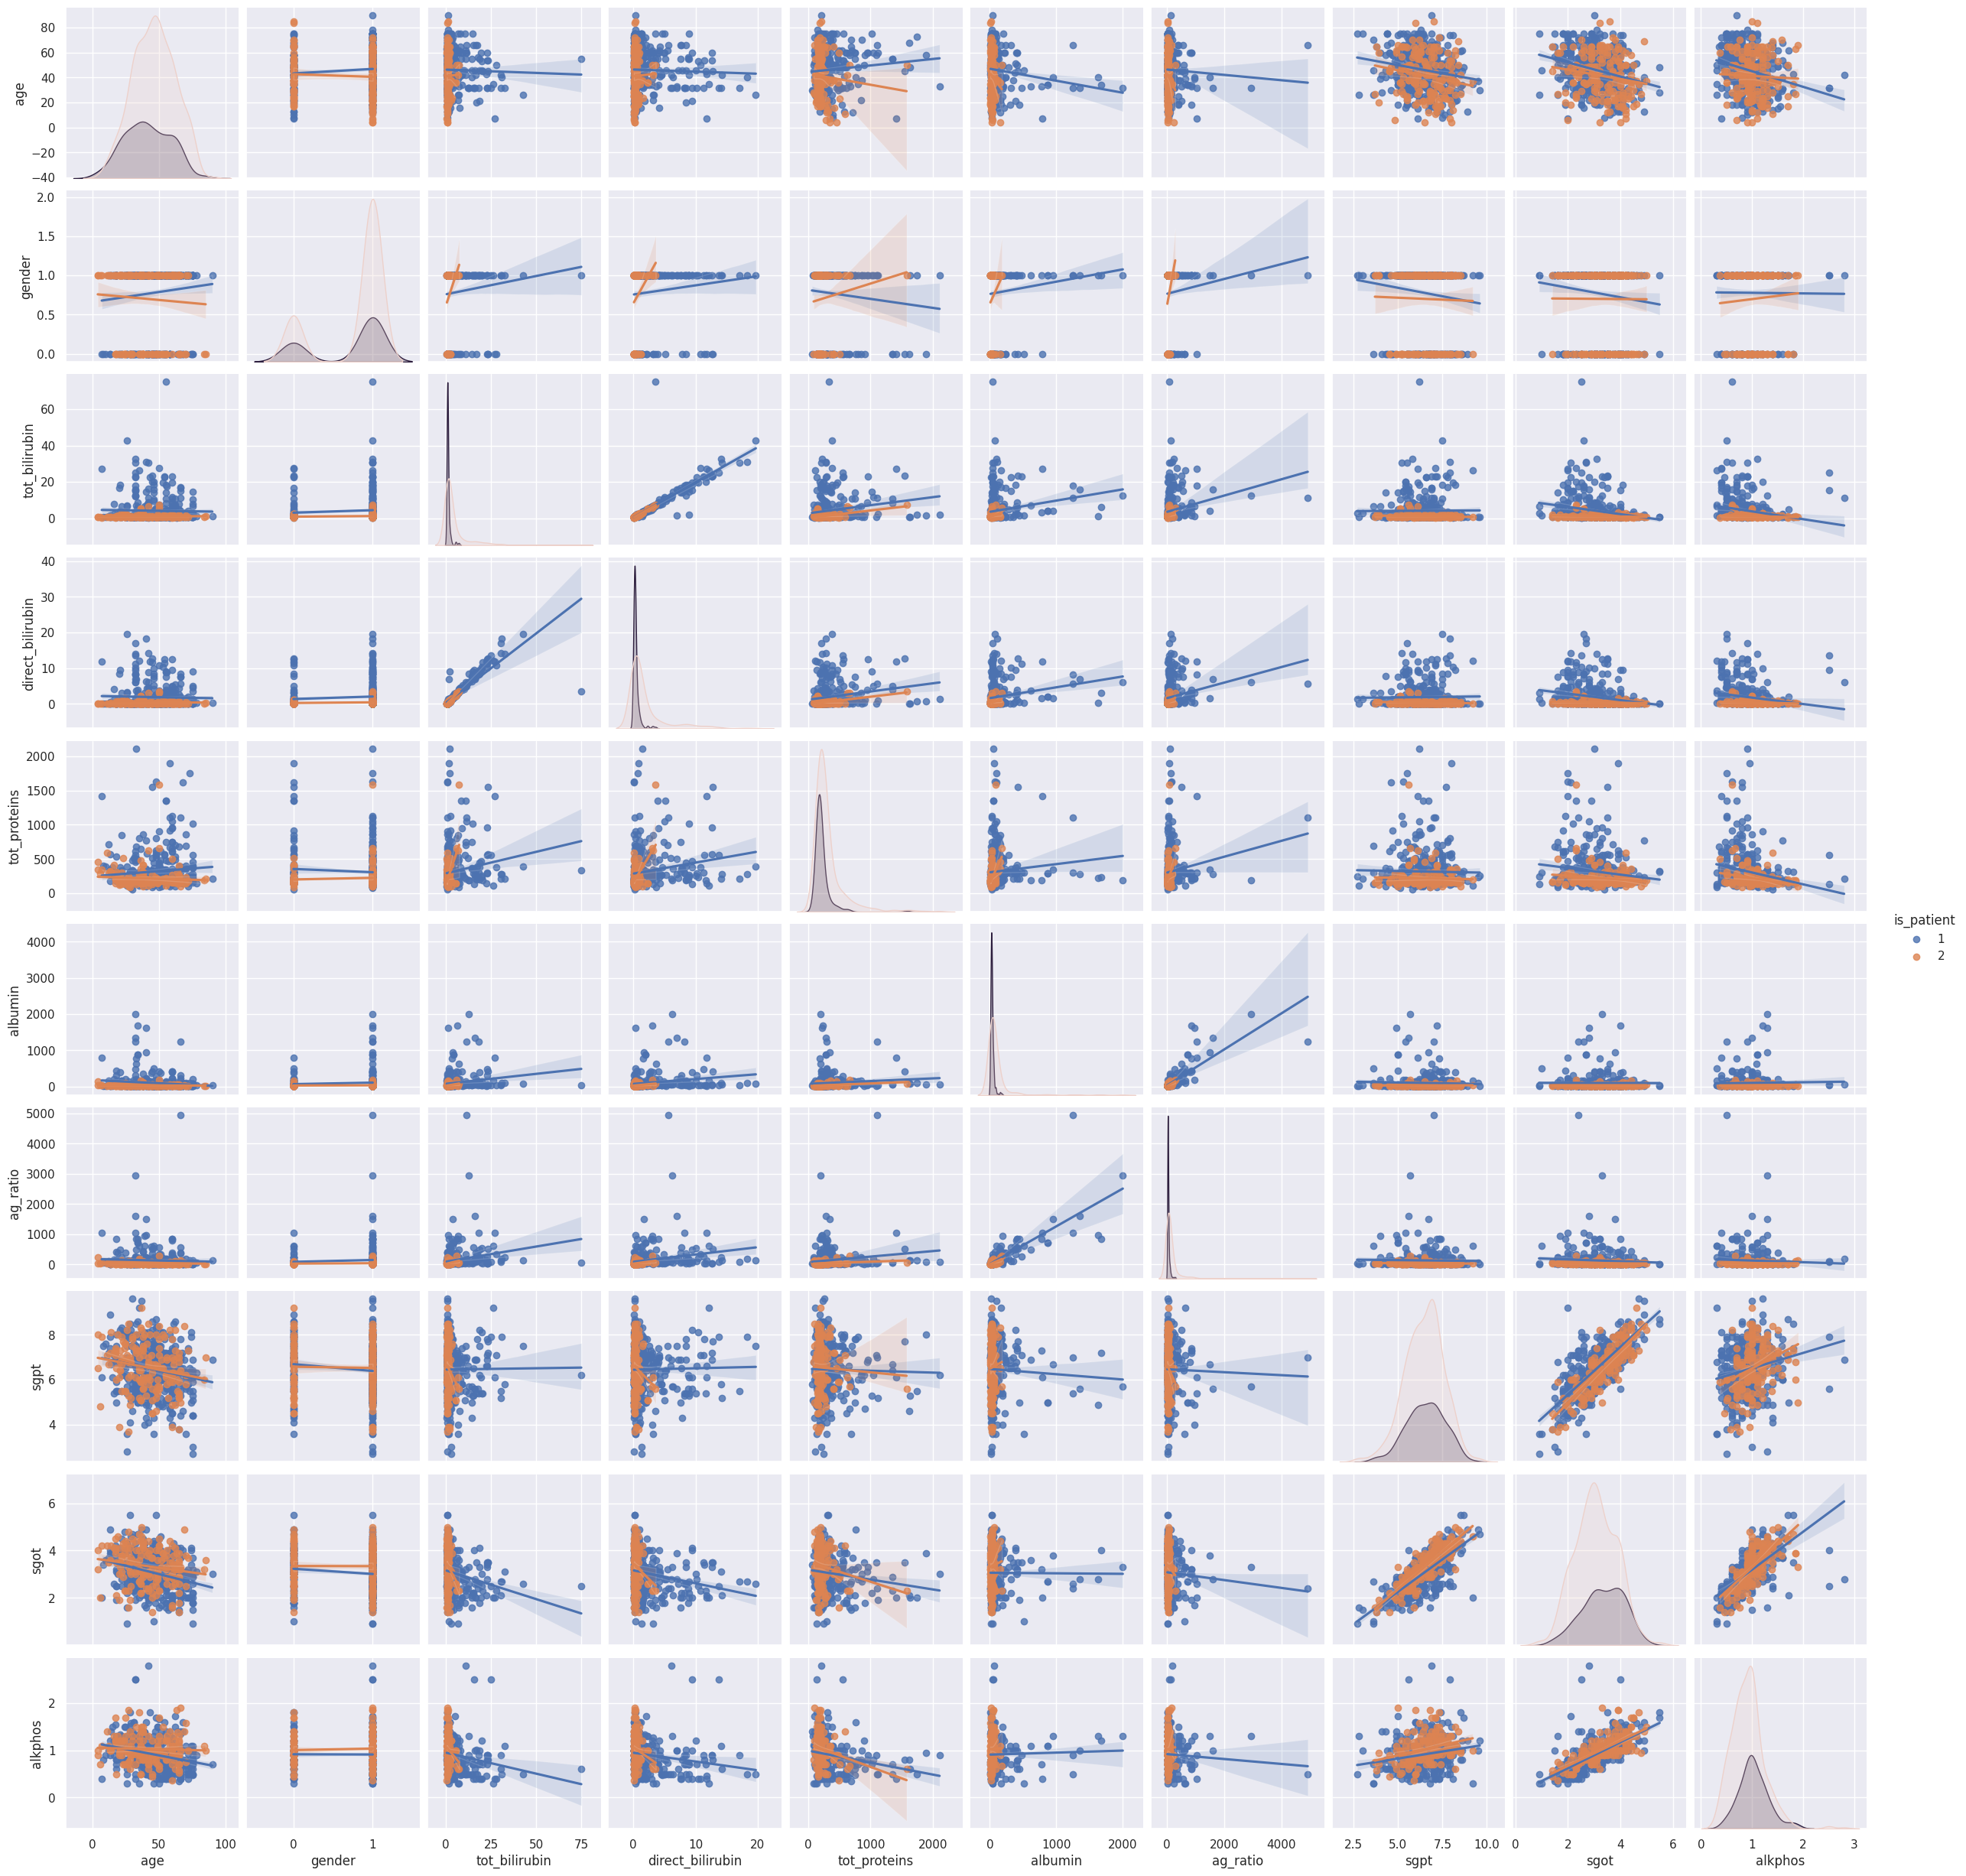

In [ ]:
import seaborn as sns
#Implementing Pairplot to see the various mixtures
sns.set()
sns.pairplot(data, hue= 'is_patient', kind = 'reg')

#sns.pairplot(df_liver, hue='Dataset', kind='reg')

# Variance Inflation to see the best models
## Later on, in the notebook, there will be a chance to see the best features by using Random Forests *best features* method

Kodingan ini mengimport fungsi 'variance_inflation_factor' (vif) dari modul statsmodels.stats.outliers_influence untuk menghitung faktor variansi inflasi (VIF) dalam analisis regresi guna mengevaluasi multicollinearity antara variabel independen.

In [ ]:
#Importing variance inflation factor from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

Kodingan ini digunakan untuk menampilkan beberapa baris pertama dari dataframe 'data' menggunakan metode 'head()' dari modul pandas.

In [ ]:
data.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# Making the Test Set, excluding the Target, i.e "y" variable in order to meet up with Variance Inflations (vif's) syntax

Kodingan ini mengambil subset dari dataframe 'data' yang terdiri dari kolom-kolom pertama hingga kolom ke-10 dan menyimpannya dalam variabel 'Test_Set_Var'.

In [ ]:
#Making New Data Sets for Computation
#Select all rows except for the Target variable
Test_Set_Var = data.iloc[:,:10]


Kodingan ini membuat dataframe 'df' yang berisi indeks VIF (faktor variansi inflasi) untuk setiap kolom dalam 'Test_Set_Var', serta nama kolomnya, kemudian mengurutkannya berdasarkan nilai VIF secara menurun (descending).

In [ ]:
df = pd.DataFrame()
df["vif_index"] = [vif(Test_Set_Var.values, i) for i in range(Test_Set_Var.shape[1])]
df["features"] = Test_Set_Var.columns
df.sort_values(by = 'vif_index', ascending=False)

,vif_index,features
8,133.055715,sgot
7,101.860900,sgpt
9,25.717649,alkphos
0,7.813077,age
3,5.736207,direct_bilirubin
2,5.479228,tot_bilirubin
1,4.087526,gender
5,3.308649,albumin
6,3.192721,ag_ratio
4,2.650280,tot_proteins


In [ ]:
#Over here we can see that sgot, sgpt, and alkphos have the highest amount for the VIF Index.
#Normally, a value above 10 would mean that we should slash it out however,
#This is a medical data set, we should still consider these variables as it seems to have some
#form of correlation according to my minimal industry knowledge. Any input would be appreciated!

# Seeing Variations in outputs with respect to Gender

#### The plots are quite small hence, I've decided to plot certain plots individually and print out a few Data Frames


Kodingan ini mengambil kolom 'gender' dan 'is_patient' dari dataframe 'data', melakukan pengelompokan berdasarkan nilai 'gender', dan menghitung jumlah (sum) nilai 'is_patient' untuk setiap kategori 'gender', lalu menyimpannya dalam dataframe 'gender_data'.

In [ ]:
gender_data = data[['gender', 'is_patient']].groupby('gender', as_index = False).agg(np.sum)
gender_data

,gender,is_patient
0,0,192
1,1,558


Kodingan ini mengimport modul matplotlib.pyplot sebagai 'plt', yang digunakan untuk membuat visualisasi grafik menggunakan fungsi-fungsi yang disediakan oleh modul tersebut.

In [ ]:
#Importing MatplotLib
import matplotlib.pyplot as plt

Kodingan ini membuat sebuah figure dengan ukuran 12x8 menggunakan plt.figure(figsize=(12,8)), memberikan judul 'Men and Women's Ratio with respect to Having Disease or Not', dan menampilkan bar plot menggunakan sns.barplot() yang menggambarkan rasio antara pria dan wanita yang memiliki atau tidak memiliki penyakit berdasarkan kolom 'gender' dan 'is_patient' dalam dataframe 'data'.

<Axes: title={'center': 'Men and Womnens Ratio with respect to Having Disease or Not'}, xlabel='gender', ylabel='is_patient'>

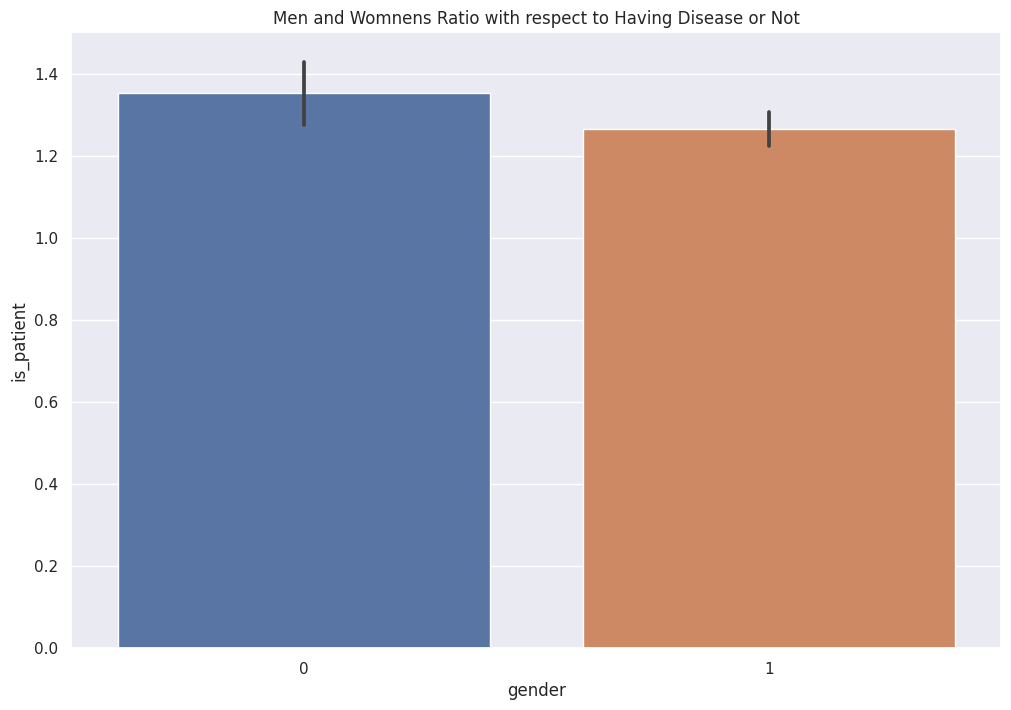

In [ ]:
plt.figure(figsize= (12,8))
plt.title('Men and Womnens Ratio with respect to Having Disease or Not')
sns.barplot(x = 'gender', y = 'is_patient', data = data)

Kodingan ini mengimport modul matplotlib.pyplot sebagai 'plt', membuat sebuah figure dengan ukuran 12x8 menggunakan plt.figure(figsize=(12,8)), memberikan judul 'Men and Women's Numbers with respect to Having Disease or Not', dan menampilkan bar plot menggunakan sns.barplot() yang menggambarkan jumlah pria dan wanita yang memiliki atau tidak memiliki penyakit berdasarkan kolom 'gender' dan 'is_patient' dalam dataframe 'gender_data'.

<Axes: title={'center': 'Men and Womnens Numbers with respect to Having Disease or Not'}, xlabel='gender', ylabel='is_patient'>

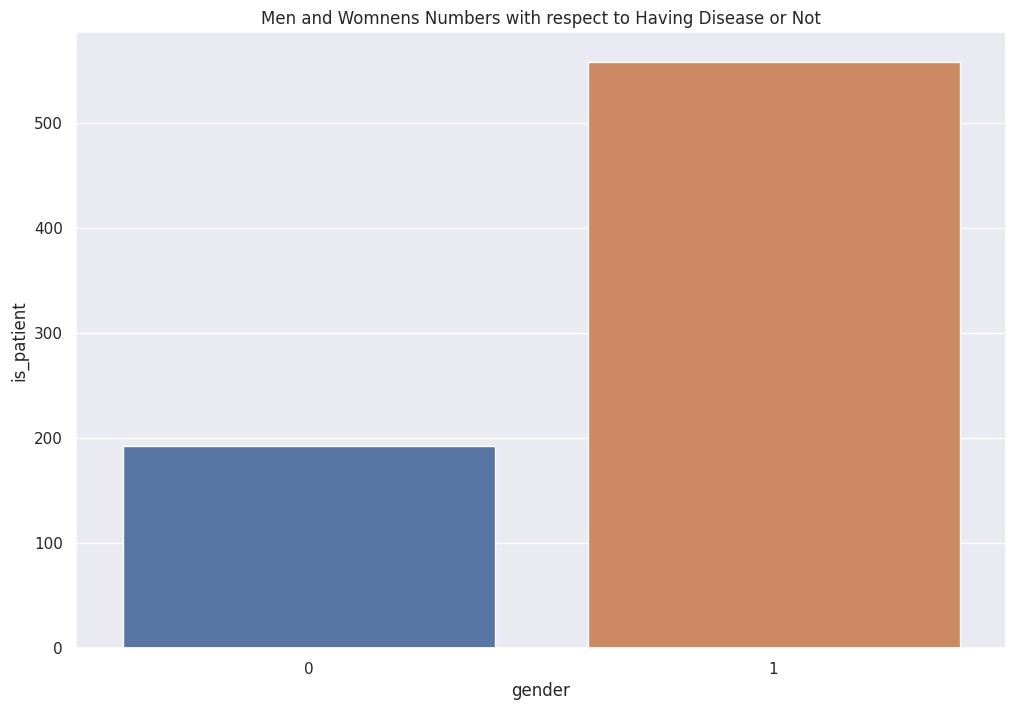

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (12,8))
plt.title('Men and Womnens Numbers with respect to Having Disease or Not')
sns.barplot(x = 'gender', y = 'is_patient', data = gender_data)

## We can see that Men have a higher chance of having Liver Disease, but how/why ?

##### Trying to see a relationship between Proteins and Gender. I'm not a Bio-med Major,
##### We can see a relationship between total_proteins, gender and their final outcome

Kodingan ini mengambil kolom 'gender', 'tot_proteins', dan 'is_patient' dari dataframe 'data', melakukan pengelompokan berdasarkan nilai 'gender', dan menghitung jumlah (sum) nilai 'tot_proteins' dan 'is_patient' untuk setiap kategori 'gender', lalu menyimpannya dalam dataframe 'df_liver_TP'.

In [ ]:
df_liver_TP = data[['gender', 'tot_proteins', 'is_patient']].groupby(['gender'], as_index=False).agg(np.sum)
df_liver_TP

,gender,tot_proteins,is_patient
0,0,42932,192
1,1,126474,558


Kodingan ini membuat sebuah figure dengan ukuran 12x8 menggunakan plt.figure(figsize=(12,8)), dan menampilkan bar plot menggunakan sns.barplot() yang menggambarkan rata-rata nilai 'tot_proteins' dengan membagi perbedaan warna berdasarkan nilai 'is_patient', terhadap kategori 'gender' yang ada dalam dataframe 'df_liver_TP'.

<Axes: xlabel='gender', ylabel='tot_proteins'>

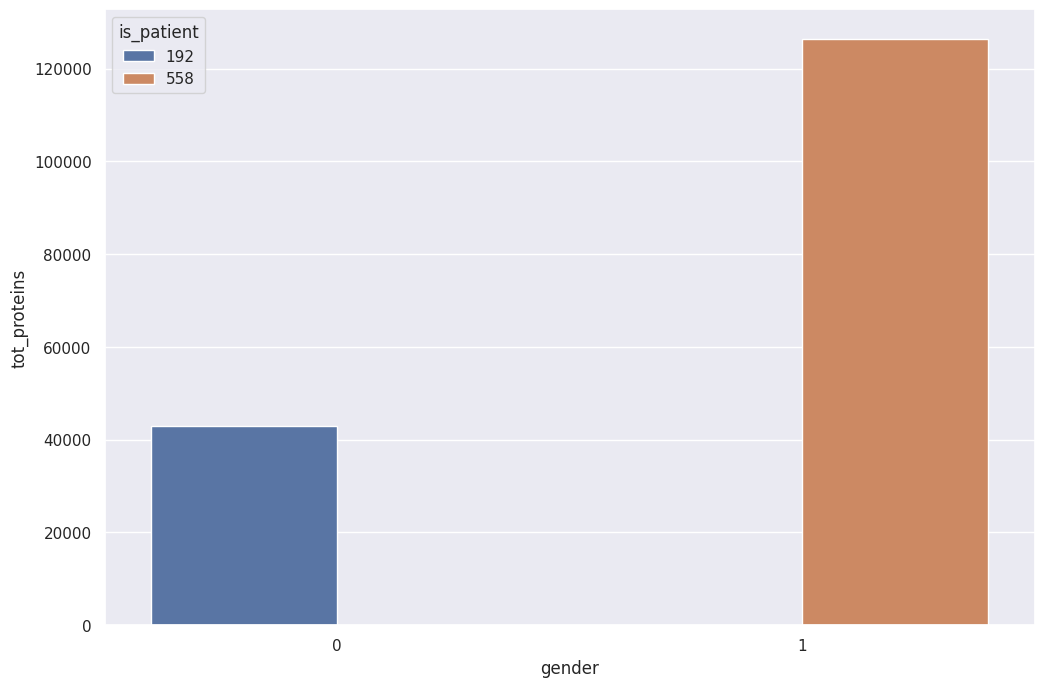

In [ ]:
#Plotting it on a graph for better visualization
plt.figure(figsize = (12,8))
sns.barplot(x = 'gender', y = 'tot_proteins', hue= 'is_patient', data = df_liver_TP)

Kodingan ini menghasilkan ringkasan statistik deskriptif dari dataframe 'data', termasuk jumlah data, nilai rata-rata, standar deviasi, nilai minimum dan maksimum, serta kuartil dari setiap kolom menggunakan metode 'describe()' dari modul pandas.

In [ ]:
#Before moving forward we can try and see the different stats of the whole data set
#This is without the NaN's meaning we haven't includes the empty variables
data.describe()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [ ]:
data.shape

(583, 11)

# Machine Learning Section (MLOps)


Kodingan ini mengimport beberapa modul dari sklearn yang digunakan untuk pemodelan dan evaluasi klasifikasi, seperti train_test_split untuk membagi dataset menjadi data latih dan data uji, DecisionTreeClassifier untuk membangun model pohon keputusan, KNeighborsClassifier untuk membangun model k-NN, LogisticRegression untuk membangun model regresi logistik, accuracy_score untuk menghitung akurasi prediksi, MinMaxScaler untuk melakukan penskalaan fitur, RandomForestClassifier untuk membangun model Random Forest, dan roc_curve serta roc_auc_score untuk evaluasi kurva ROC dan area di bawah kurva ROC.

In [ ]:
#Importing the Necessary Modules
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

Kodingan ini memisahkan dataset 'data' menjadi atribut (fitur) yang disimpan dalam variabel 'X', yaitu kolom-kolom pertama hingga kolom ke-10, dan target yang disimpan dalam variabel 'y', yaitu kolom 'is_patient'.

In [ ]:
#Defining X and y as we never defined it
X = data.iloc[:, :10]
y = data['is_patient']

# Scaling using MinMaxScaler

Kodingan ini menggunakan MinMaxScaler dari sklearn untuk melakukan penskalaan fitur pada dataset 'X' dengan rentang nilai antara 0 dan 1, dan menyimpan hasil penskalaan kembali ke dataframe 'X'.

In [ ]:
#Using Scaling Methods to scale the entire data set as I'm running into errors
scaler=MinMaxScaler()
scaled_values=scaler.fit_transform(X)
X.loc[:,:]=scaled_values

<ipython-input-32-5245e6a254a5>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:,:]=scaled_values


# Using Hold Out Method.
## I was a bit skeptical to use the Cross-Validation method but I would maybe give it a try

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state = 123)

Kodingan ini membagi dataset 'X' dan 'y' menjadi data latih (X_train, y_train) dan data uji (X_test, y_test) menggunakan train_test_split dari sklearn, dengan ukuran data uji sebesar 30% dari total data, dan menggunakan random_state = 123 untuk memastikan hasil yang konsisten dalam pembagian data yang sama.

Kodingan ini digunakan untuk mencetak jumlah nilai yang hilang (null) pada setiap kolom dalam X_train, y_train, X_test, dan y_test, dengan tujuan untuk memeriksa adanya nilai yang hilang dalam dataset latih dan uji.

In [ ]:
#Checking to see isnull again, I'm good so far :)
print(X_train.isnull().sum())
print(y_train.isnull().sum())
print(X_test.isnull().sum())
print(y_test.isnull().sum())

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             0
dtype: int64
0
age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             0
dtype: int64
0


Checking to see Shape Again

Kodingan ini digunakan untuk mencetak dimensi (shape) dari X_train dan y_train, yaitu jumlah baris dan kolom dalam masing-masing dataset, dengan tujuan untuk memeriksa jumlah data yang ada dalam setiap dataset.

In [ ]:
print(f'Shape of X:{X_train.shape}, Shape of y: {y_train.shape}')

Shape of X:(408, 10), Shape of y: (408,)


Kodingan ini digunakan untuk mencetak dimensi (shape) dari X_test dan y_test, yaitu jumlah baris dan kolom dalam masing-masing dataset, dengan tujuan untuk memeriksa jumlah data yang ada dalam setiap dataset uji.

In [ ]:
print(f'Shape of X:{X_test.shape}, Shape of y: {y_test.shape}')

Shape of X:(175, 10), Shape of y: (175,)


# Instantiating Classifiers


Kodingan ini mendefinisikan beberapa model klasifikasi, yaitu DecisionTreeClassifier dengan maksimal kedalaman 4 dan jumlah sampel minimum leaf 0.14, LogisticRegression dengan solver 'lbfgs' dan multi_class 'ovr', KNN dengan jumlah tetangga terdekat 10, serta RandomForestClassifier dengan jumlah estimator 25 dan random state 2.

In [ ]:
#Instantiating 3 Classification Models
dt = DecisionTreeClassifier(max_depth=4,min_samples_leaf=0.14,random_state=1)
lr = LogisticRegression(solver='lbfgs', multi_class='ovr')
KNN_1 = KNN(n_neighbors = 10)
rf = RandomForestClassifier(n_estimators=25, random_state=2)

# Making a List of Tuples for Automating the results
## First I would like to individually hard code them however, both methods shall be used :)

Kodingan ini membuat sebuah list classifiers yang berisi beberapa pasangan (nama, model) yang akan digunakan untuk melakukan klasifikasi, yaitu Decision Tree (dt), Logistic Regression (lr), KNN (KNN_1), dan Random Forest (rf).

In [ ]:
classifiers = [('Decision Tree',dt),('Logistic Regression',lr),('KNN',KNN_1), ('Random Forest', rf)]

# Decision Tree Classifier


Kodingan ini melatih model Decision Tree (dt) menggunakan X_train dan y_train, melakukan prediksi terhadap X_test menggunakan model yang telah dilatih, menghitung akurasi prediksi (dt_acc_test) dengan membandingkan hasil prediksi dengan nilai sebenarnya y_test, dan mencetak nilai akurasi prediksi untuk data uji (Test set accuracy of dt).

In [ ]:
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)
dt_acc_test = accuracy_score(y_test, dt_y_pred)
print('Test set accuracy of dt: {:.2f}'.format(dt_acc_test))

Test set accuracy of dt: 0.70


# Logisitic Regression

Kodingan ini melatih model Logistic Regression (lr) menggunakan X_train dan y_train, melakukan prediksi terhadap X_test menggunakan model yang telah dilatih, menghitung akurasi prediksi (lr_acc_test) dengan membandingkan hasil prediksi dengan nilai sebenarnya y_test, dan mencetak nilai akurasi prediksi untuk data uji (Test set accuracy of lr).

In [ ]:
#Logistic Regression Accuracy
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)
lr_acc_test = accuracy_score(y_test, lr_y_pred)
print('Test set accuracy of dt: {:.2f}'.format(lr_acc_test))

Test set accuracy of dt: 0.73


# K-Neighbors Classifier

Kodingan ini melatih model KNN (KNN_1) menggunakan X_train dan y_train, melakukan prediksi terhadap X_test menggunakan model yang telah dilatih, menghitung akurasi prediksi (knn_acc_test) dengan membandingkan hasil prediksi dengan nilai sebenarnya y_test, dan mencetak nilai akurasi prediksi untuk data uji (Test set accuracy of KNN_1).

In [ ]:
#KNN Accuracy
KNN_1.fit(X_train, y_train)
knn_y_pred = KNN_1.predict(X_test)
knn_acc_test = accuracy_score(y_test, knn_y_pred)
print('Test set accuracy of dt: {:.2f}'.format(knn_acc_test))

Test set accuracy of dt: 0.69


# Random Forest Classifier

Kodingan ini melatih model Random Forest (rf) menggunakan X_train dan y_train, melakukan prediksi terhadap X_test menggunakan model yang telah dilatih, menghitung akurasi prediksi (rf_acc_test) dengan membandingkan hasil prediksi dengan nilai sebenarnya y_test, dan mencetak nilai akurasi prediksi untuk data uji (Test set accuracy of rf).






In [ ]:
#Random Forest Accuracy
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
rf_acc_test = accuracy_score(y_test, rf_y_pred)
print('Test set accuracy of dt: {:.2f}'.format(rf_acc_test))

Test set accuracy of dt: 0.73


# Random Forest's Feature Importance

Kodingan ini menghitung tingkat kepentingan (importance) fitur-fitur dalam model Random Forest (rf) menggunakan feature_importances_, kemudian mengurutkan nilai importance tersebut, menggambar diagram batang horizontal (bar plot) untuk menampilkan tingkat kepentingan setiap fitur, memberikan judul pada diagram, dan menampilkannya menggunakan plt.show().

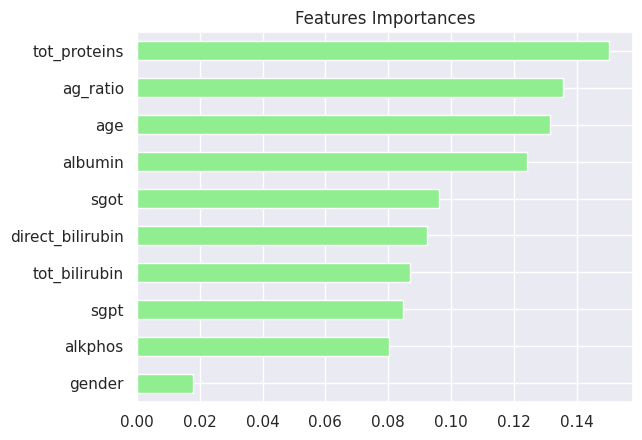

In [ ]:
#Using RF to see Best Features
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

# Running the Automation Method :)

Kodingan ini melakukan pelatihan dan pengujian terhadap beberapa model klasifikasi yang terdapat dalam list classifiers, dengan memanggil metode fit untuk melatih model, melakukan prediksi terhadap X_test, menghitung akurasi prediksi menggunakan accuracy_score, dan mencetak nilai akurasi prediksi untuk setiap model klasifikasi.

In [ ]:
#Decided to run them all together and print them out in a for loop for Automation
for clf_name, clf in classifiers:
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

Decision Tree : 0.703
Logistic Regression : 0.726
KNN : 0.691
Random Forest : 0.731


# Predict Proba Scores
## For those who don't know, Predict Proba basically means the probability of having the correct output i.e 1 or 0


Kodingan ini menghasilkan nilai probabilitas prediksi positif (y_score1, y_score2, y_score3, y_score4) untuk masing-masing model (dt, lr, KNN_1, rf) berdasarkan X_test, yang merupakan probabilitas prediksi kelas positif dari fungsi predict_proba.

In [ ]:
#Predict Proba Scores
y_score1 = dt.predict_proba(X_test)[:,1]
y_score2 = lr.predict_proba(X_test)[:,1]
y_score3 = KNN_1.predict_proba(X_test)[:,1]
y_score4 = rf.predict_proba(X_test)[:,1]

# Receiver Operating Characteristic (ROC) and Area under the curve (AUC) Score

Kodingan ini mencetak nilai roc_auc_score yang merupakan metrik evaluasi kinerja model untuk masing-masing model (DecisionTree, Logistic Regression, KNearest Neighbors, Random Forest) berdasarkan y_test dan y_score yang merupakan probabilitas prediksi positif dari setiap model.

In [ ]:
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score2))
print('roc_auc_score for KNearest Neighbors: ', roc_auc_score(y_test, y_score3))
print('roc_auc_score for Random Forest: ', roc_auc_score(y_test, y_score4))

roc_auc_score for DecisionTree:  0.7021379980563655
roc_auc_score for Logistic Regression:  0.7048914804016846
roc_auc_score for KNearest Neighbors:  0.6484450923226434
roc_auc_score for Random Forest:  0.7364755425979915


# Plotting the Random Forests ROC Curve


Kodingan ini menggambar kurva Receiver Operating Characteristic (ROC) menggunakan plt.plot dengan False Positive Rate (FPR) sebagai sumbu x dan True Positive Rate (TPR) sebagai sumbu y, memberikan label berupa nilai AUC (Area Under the Curve), menambahkan label sumbu y dan sumbu x, menampilkan legenda dengan lokasi 4, dan menampilkan plot kurva ROC menggunakan plt.show().


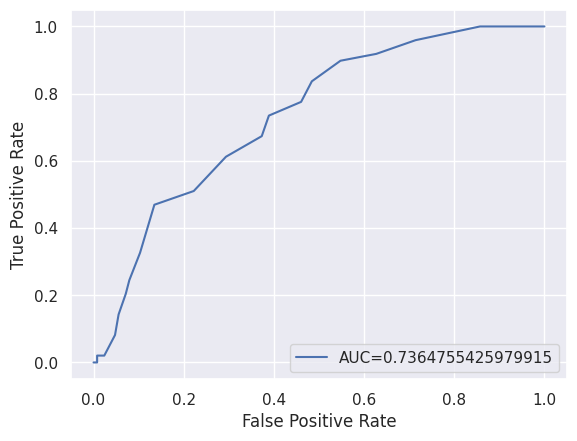

In [ ]:
#define metrics
y_pred_proba_rf_auc = rf.predict_proba(X_test)[::,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test,  y_pred_proba_rf_auc, pos_label = 2)
rf_auc = roc_auc_score(y_test, y_score4)


#create ROC curve
plt.plot(fpr_rf,tpr_rf,label="AUC="+str(rf_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Plotting the Logistic Regressions ROC Curve

Kodingan ini menghitung probabilitas prediksi positif (y_pred_proba_auc_lr) menggunakan model Logistic Regression (lr) dan X_test, menghitung False Positive Rate (FPR) dan True Positive Rate (TPR) menggunakan roc_curve, menghitung nilai AUC menggunakan roc_auc_score, menggambar kurva ROC dengan plt.plot menggunakan FPR sebagai sumbu x dan TPR sebagai sumbu y, memberikan label berupa nilai AUC, menambahkan label sumbu y dan sumbu x, menampilkan legenda dengan lokasi 4, dan menampilkan plot kurva ROC menggunakan plt.show().

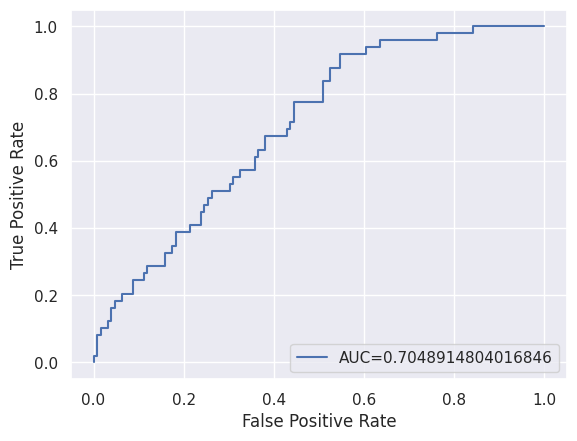

In [ ]:
#define metrics
y_pred_proba_auc_lr = lr.predict_proba(X_test)[::,1]
fpr_lr, tpr_lr, _ = roc_curve(y_test,  y_pred_proba_auc_lr, pos_label = 2)
lr_auc = roc_auc_score(y_test, y_score2)


#create ROC curve
plt.plot(fpr_lr,tpr_lr,label="AUC="+str(lr_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc =4)
plt.show()

# Plotting the KNearestNeighbors ROC Curve

Kodingan ini menghitung probabilitas prediksi positif (y_pred_proba_auc_knn) menggunakan model KNearest Neighbors (KNN_1) dan X_test, menghitung False Positive Rate (FPR) dan True Positive Rate (TPR) menggunakan roc_curve, menghitung nilai AUC menggunakan roc_auc_score, menggambar kurva ROC dengan plt.plot menggunakan FPR sebagai sumbu x dan TPR sebagai sumbu y, memberikan label berupa nilai AUC, menambahkan label sumbu y dan sumbu x, menampilkan legenda dengan lokasi 4, dan menampilkan plot kurva ROC menggunakan plt.show().

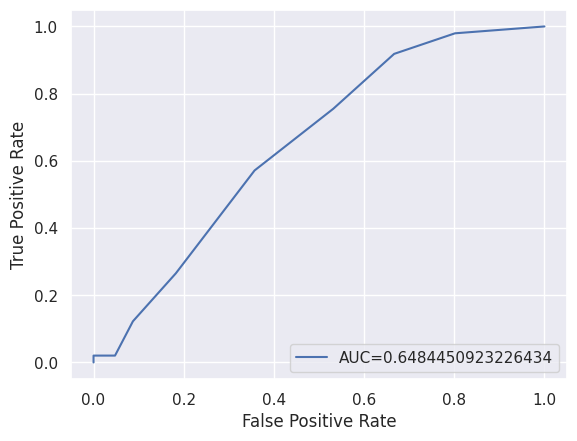

In [ ]:
#define metrics
y_pred_proba_auc_knn = KNN_1.predict_proba(X_test)[::,1]
fpr_knn, tpr_knn, _ = roc_curve(y_test,  y_pred_proba_auc_knn, pos_label = 2)
knn_auc = roc_auc_score(y_test, y_score3)

#create ROC curve
plt.plot(fpr_knn,tpr_knn,label="AUC="+str(knn_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc =4)
plt.show()

# Plotting the Decision Tree's ROC Curve


Kodingan ini menghitung probabilitas prediksi positif (y_pred_proba_auc_knn) menggunakan model KNearest Neighbors (KNN_1) dan X_test, menghitung False Positive Rate (FPR) dan True Positive Rate (TPR) menggunakan roc_curve, menghitung nilai AUC menggunakan roc_auc_score, menggambar kurva ROC dengan plt.plot menggunakan FPR sebagai sumbu x dan TPR sebagai sumbu y, memberikan label berupa nilai AUC, menambahkan label sumbu y dan sumbu x, menampilkan legenda dengan lokasi 4, dan menampilkan plot kurva ROC menggunakan plt.show().

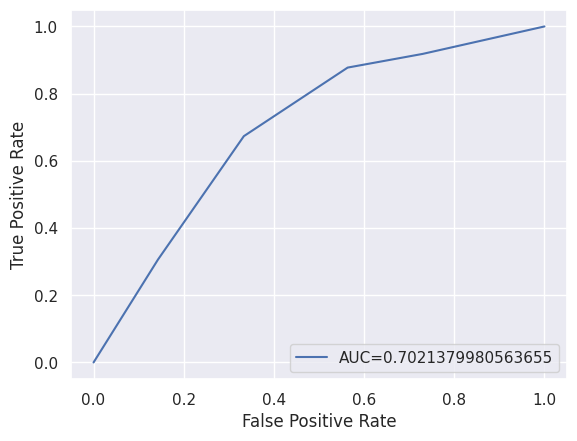

In [ ]:
#define metrics
y_pred_proba_auc_dt = dt.predict_proba(X_test)[::,1]
fpr_dt, tpr_dt, _ = roc_curve(y_test,  y_pred_proba_auc_dt, pos_label = 2)
dt_auc = roc_auc_score(y_test, y_score1)


#create ROC curve
plt.plot(fpr_dt,tpr_dt,label="AUC="+str(dt_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc =4)
plt.show()

# Results in a Data Frame


Kodingan ini membuat dataframe 'results' yang berisi model-model (Decision Tree, Logistic Regression, KNN, dan Random Forest Classifier) beserta nilai Roc_Score (AUC) dan Accuracy_Score (akurasi) dari masing-masing model berdasarkan hasil prediksi terhadap data uji (y_test dan y_score). Selanjutnya, dataframe 'df_results' dibuat dengan mengurutkan model berdasarkan Roc_Score secara menurun.






In [ ]:
results = pd.DataFrame({'Model': ['Decision Tree','Logistic Regression', 'KNN','Random Forest Classifier'],
                        'Roc_Score': [roc_auc_score(y_test, y_score1), roc_auc_score(y_test, y_score2),roc_auc_score(y_test, y_score3), roc_auc_score(y_test, y_score4)],
                       'Accuracy_Score': [dt_acc_test, lr_acc_test,knn_acc_test, rf_acc_test]})
df_results = results.sort_values(by='Roc_Score', ascending=False)
df_results

,Model,Roc_Score,Accuracy_Score
3,Random Forest Classifier,0.736476,0.731429
1,Logistic Regression,0.704891,0.725714
0,Decision Tree,0.702138,0.702857
2,KNN,0.648445,0.691429


# Any input would be highly appreciated :D